In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import sys
import importlib
sys.path.append('../')

import utils
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\USUARIO\\Desktop\\Projects\\4Geeks_temporal_series\\src\\aquifer\\..\\utils.py'>

In [16]:
df = pd.read_csv('../../data/raw/Aquifer_Petrignano.csv')
df = utils.turn_column_into_date(df, 'Date')
df.head()

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
Date,,,,,,,
2006-03-14,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
2006-03-15,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2006-03-16,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
2006-03-17,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
2006-03-18,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


# Valores faltantes

In [17]:
utils.get_null_percentage_per_column(df)

Rainfall_Bastia_Umbra                   19.605591
Temperature_Bastia_Umbra                19.605591
Temperature_Petrignano                  19.605591
Hydrometry_Fiume_Chiascio_Petrignano    19.605591
Volume_C10_Petrignano                    3.790925
Depth_to_Groundwater_P24                 1.053035
Depth_to_Groundwater_P25                 0.746697
dtype: float64

In [18]:
df = utils.remove_columns_with_nulls_percent(df, threshold=50)
df = utils.interpolate_df(df)

Columnas eliminadas por alto porcentaje de valores nulos (50%): []
Valores nulos después de la interpolación:
Series([], dtype: int64)


c:\Users\USUARIO\Desktop\Projects\4Geeks_temporal_series\src\aquifer\..\utils.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Relleno hacia adelante
c:\Users\USUARIO\Desktop\Projects\4Geeks_temporal_series\src\aquifer\..\utils.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Relleno hacia atrás


In [19]:
utils.get_null_percentage_per_column(df)

Rainfall_Bastia_Umbra                   0.0
Depth_to_Groundwater_P24                0.0
Depth_to_Groundwater_P25                0.0
Temperature_Bastia_Umbra                0.0
Temperature_Petrignano                  0.0
Volume_C10_Petrignano                   0.0
Hydrometry_Fiume_Chiascio_Petrignano    0.0
dtype: float64

# Análisis de tendencias

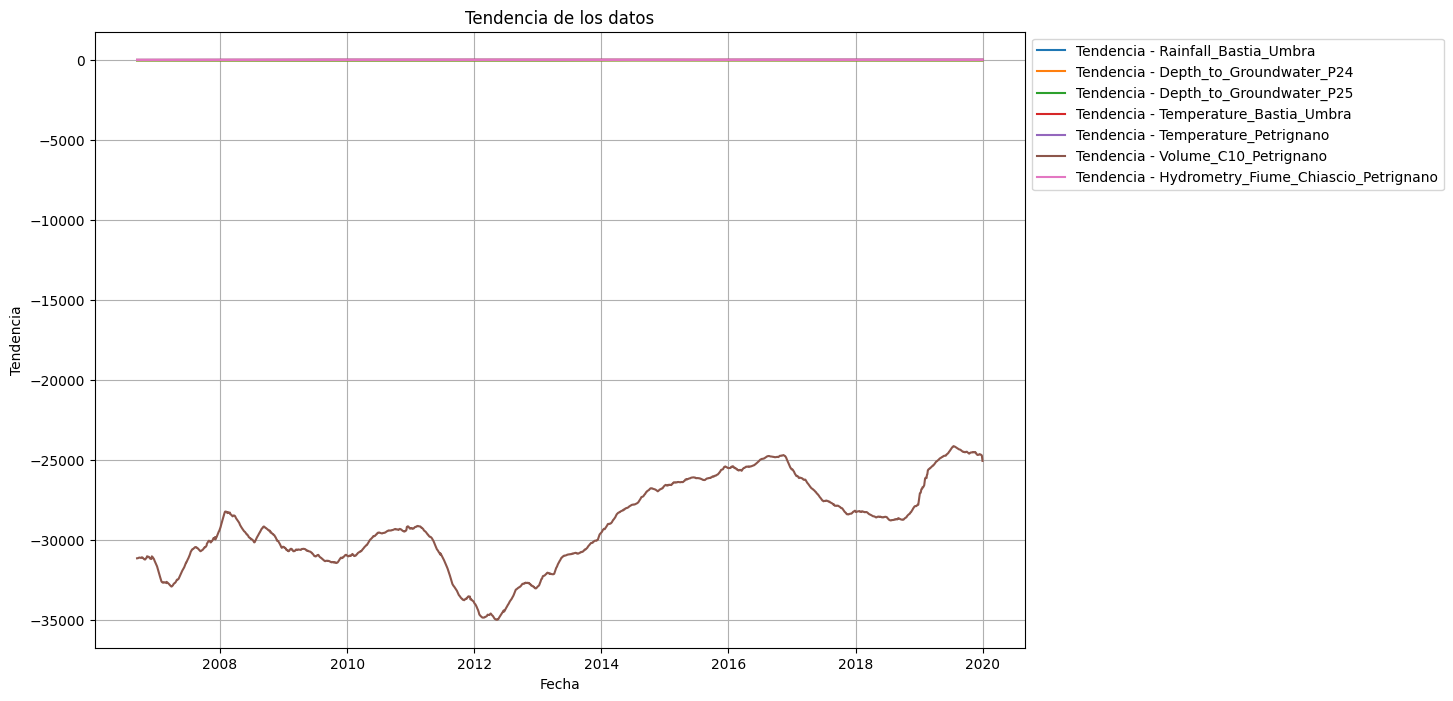

In [20]:
utils.plot_trend(df, period=365)

# Análisis de estacionalidad

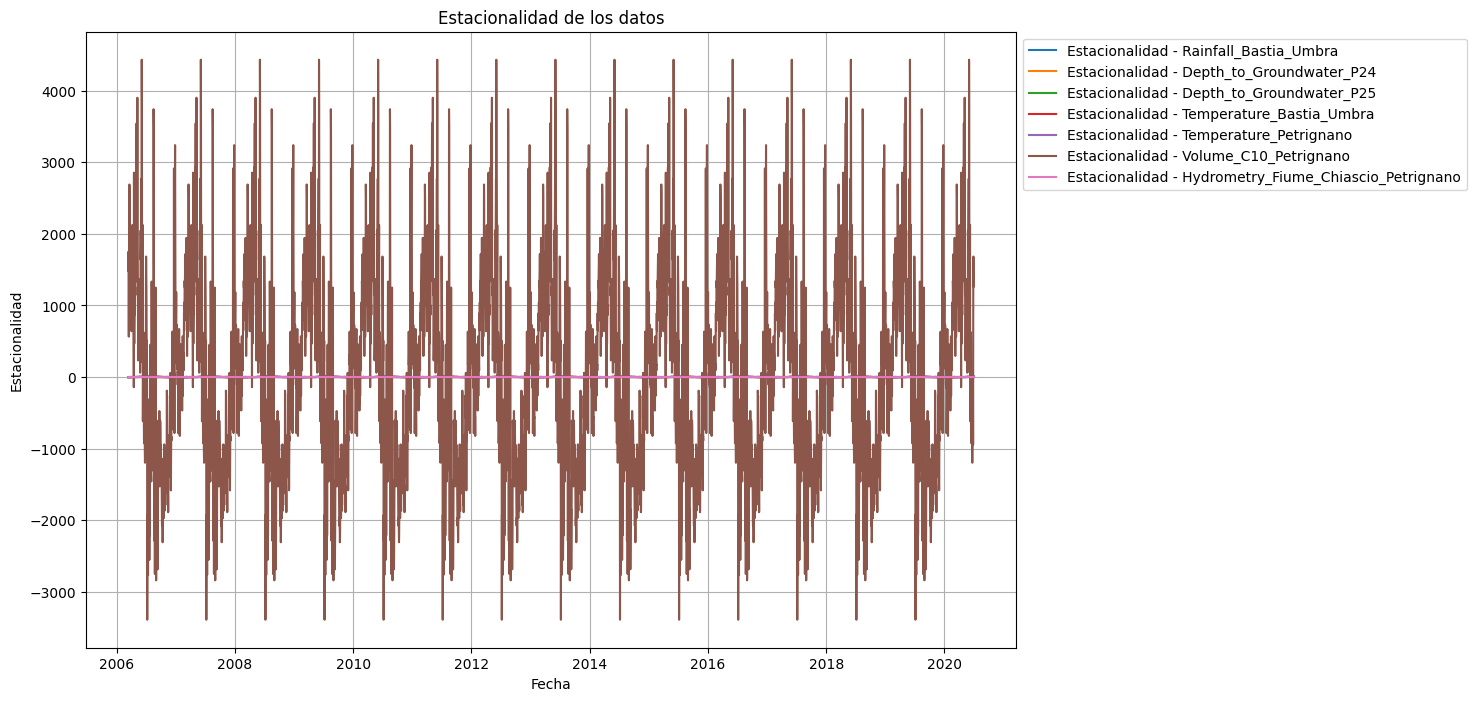

In [21]:
utils.plot_seasonality(df, period=365)

# Prueba de estacionariedad

In [22]:
utils.test_stationarity(df)

Resultados de la prueba de Dickey-Fuller para 'Rainfall_Bastia_Umbra':
Test Statistic                -1.420540e+01
p-value                        1.758457e-26
#Lags Used                     1.500000e+01
Number of Observations Used    5.207000e+03
Critical Value (1%)           -3.431606e+00
Critical Value (5%)           -2.862095e+00
Critical Value (10%)          -2.567066e+00
dtype: float64
--------------------------------------------------------------------------------
Resultados de la prueba de Dickey-Fuller para 'Depth_to_Groundwater_P24':
Test Statistic                   -2.740968
p-value                           0.067213
#Lags Used                       30.000000
Number of Observations Used    5192.000000
Critical Value (1%)              -3.431610
Critical Value (5%)              -2.862097
Critical Value (10%)             -2.567066
dtype: float64
--------------------------------------------------------------------------------
Resultados de la prueba de Dickey-Fuller para 'Depth_t

# Análisis de variabilidad

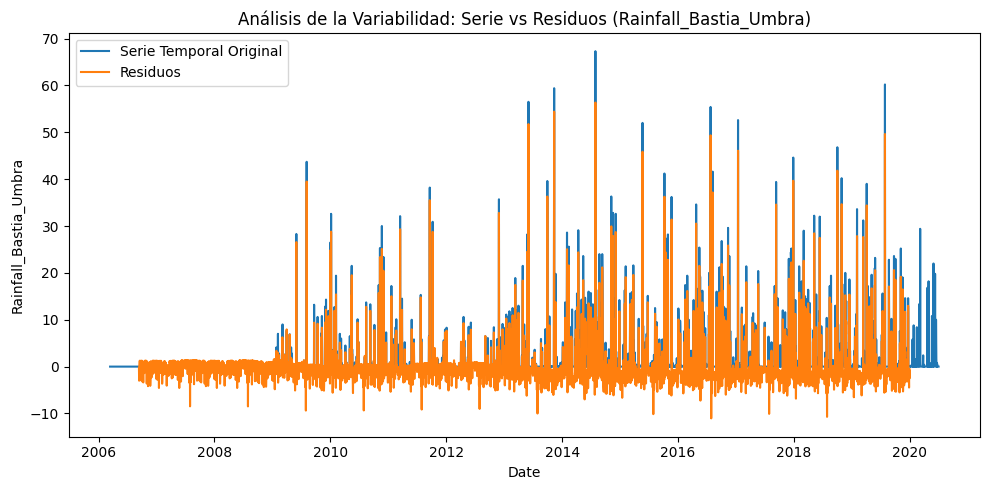

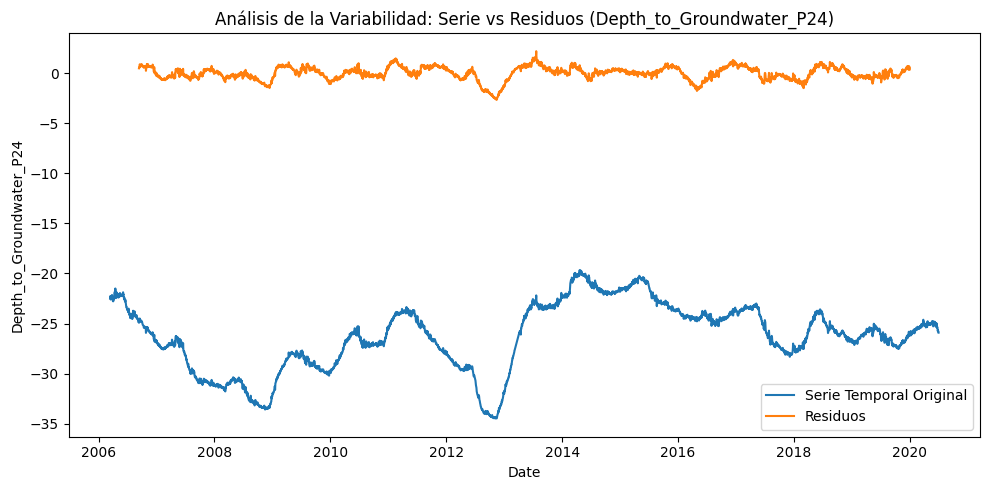

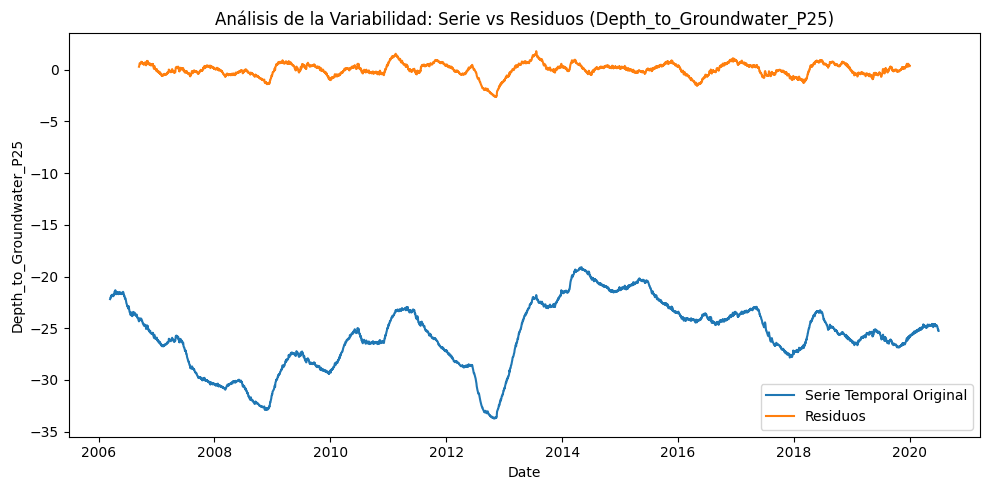

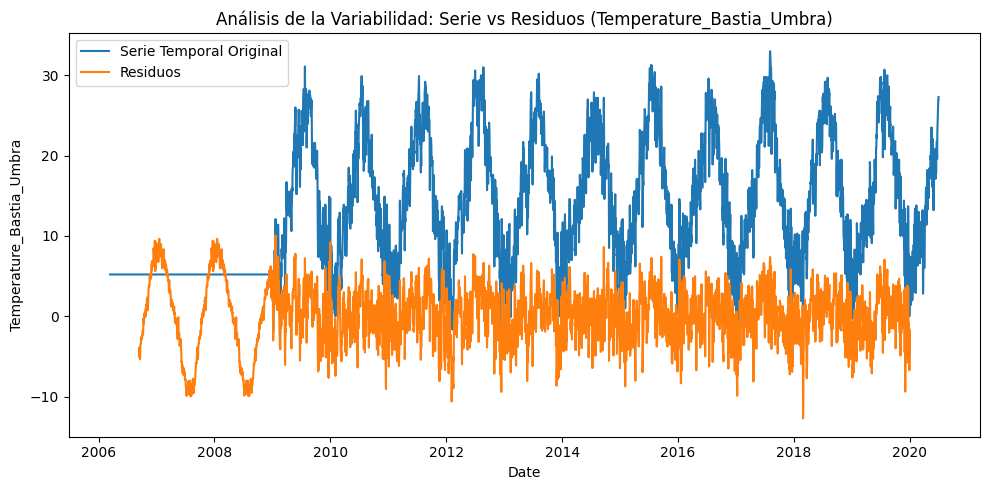

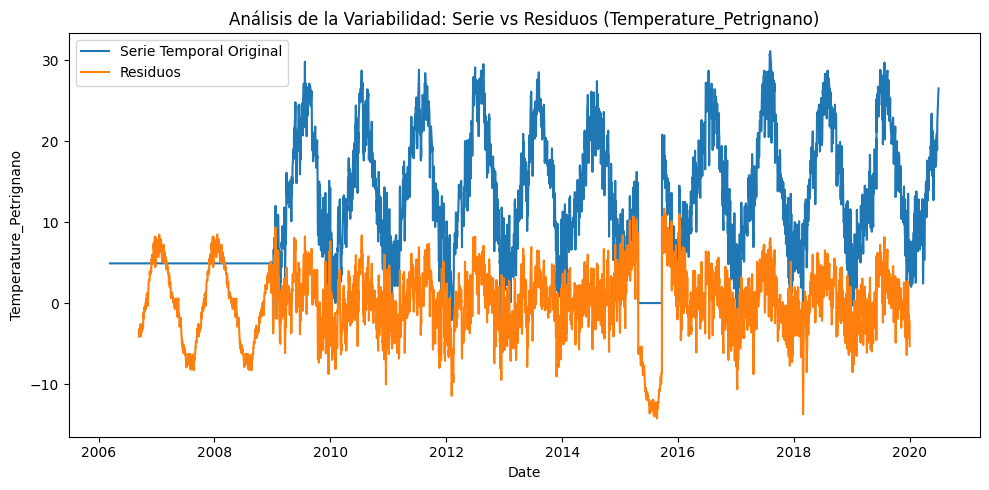

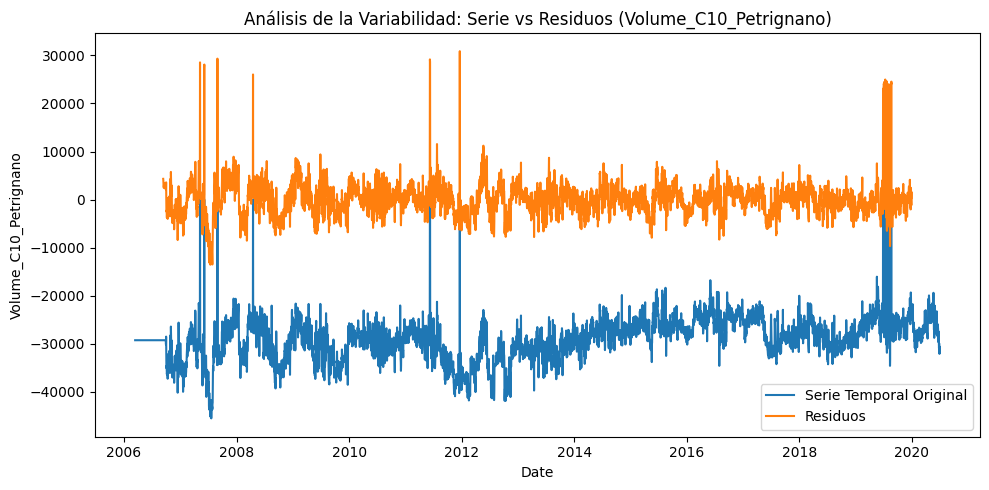

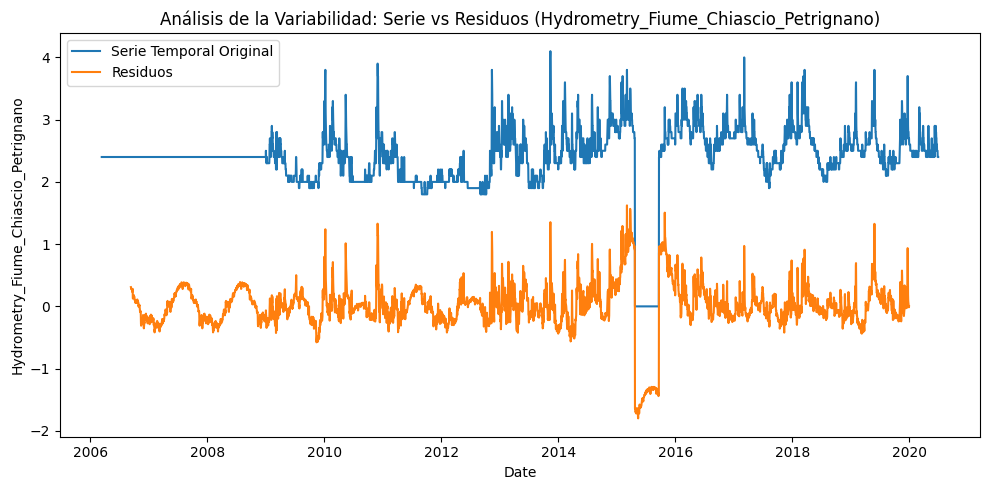

In [23]:
utils.plot_variability(df, period=365)

# Análisis de autocorrelación

<Figure size 1000x500 with 0 Axes>

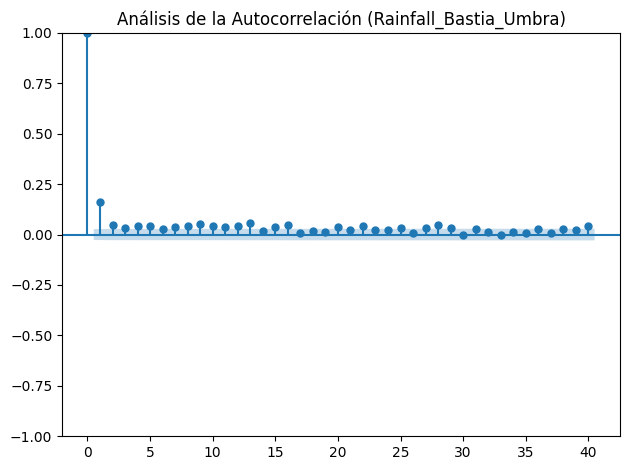

<Figure size 1000x500 with 0 Axes>

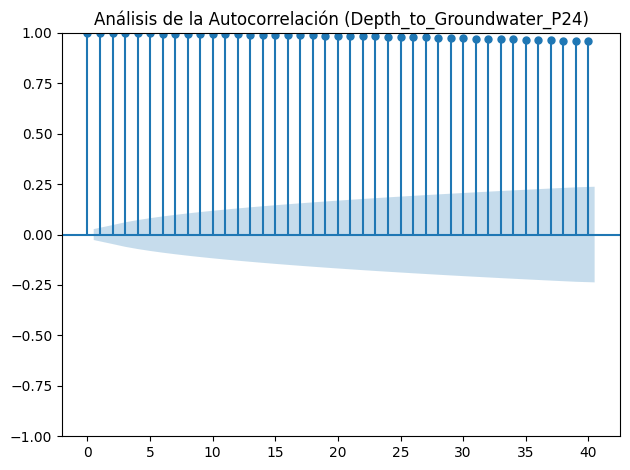

<Figure size 1000x500 with 0 Axes>

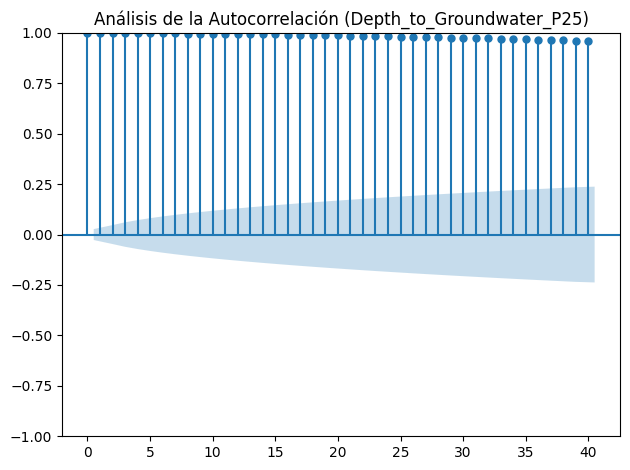

<Figure size 1000x500 with 0 Axes>

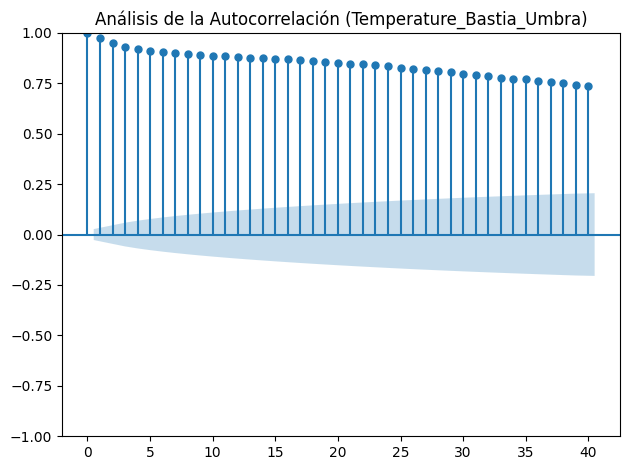

<Figure size 1000x500 with 0 Axes>

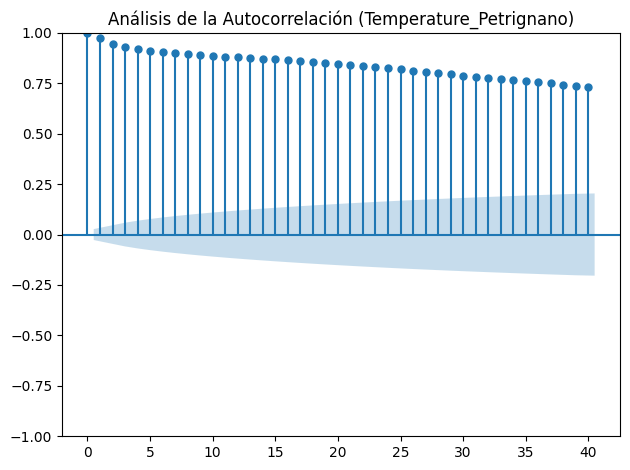

<Figure size 1000x500 with 0 Axes>

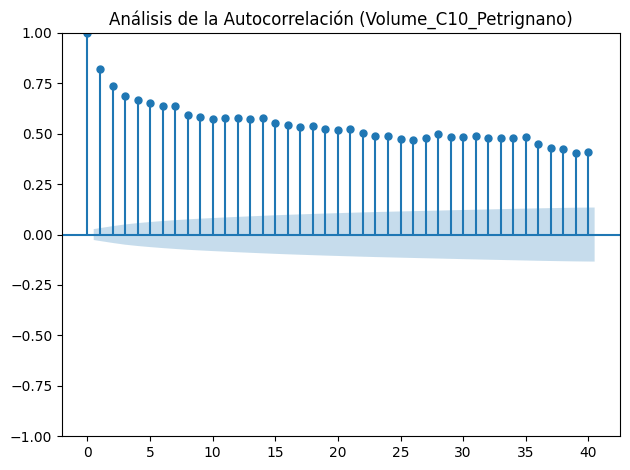

<Figure size 1000x500 with 0 Axes>

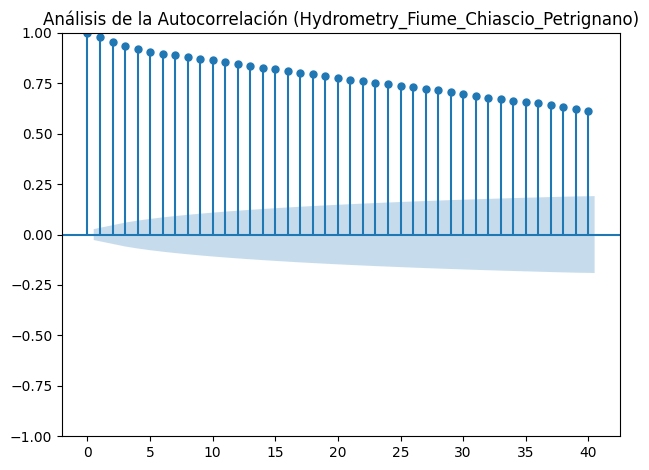

In [24]:
utils.plot_autocorrelation(df)

In [25]:
df.to_csv("../../data/processed/aquifer_petrignano.csv", index=True)